In [2]:
# import the libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as m

from datetime import datetime as dt

In [71]:
# load movietweeting ratings.dat
mt_ratings = pd.read_csv('MovieTweetings-master/latest/ratings.dat', 
                         delimiter='::', 
                         names=['user_id', 'movie_id', 'rating', 'timestamp'],
                         index_col=3,
                         parse_dates=True)

mt_ratings.index = pd.to_datetime(mt_ratings.index ,unit='s')
mt_ratings['timestamp_dup'] = mt_ratings.index
mt_ratings = mt_ratings.sort_index()

# load movietweeting movies.dat
mt_movies = pd.read_csv('MovieTweetings-master/latest/movies.dat', 
                        delimiter='::', 
                        names=['movie_id', 'title', 'genre_str'],
                        index_col=0)

print mt_ratings.shape
print mt_movies.shape

C:\Users\Panangam\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\Panangam\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


(686954, 4)
(30395, 2)


In [72]:
mt_ratings.head()

,user_id,movie_id,rating,timestamp_dup
timestamp,,,,
2013-02-28 14:38:27,36568,2171847,6,2013-02-28 14:38:27
2013-02-28 14:43:44,32501,444778,8,2013-02-28 14:43:44
2013-02-28 14:47:18,6227,1411238,6,2013-02-28 14:47:18
2013-02-28 14:58:23,42816,1496422,7,2013-02-28 14:58:23
2013-02-28 15:00:53,33145,118799,5,2013-02-28 15:00:53


In [73]:
mt_movies.head()

,title,genre_str
movie_id,,
8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
10,La sortie des usines Lumière (1895),Documentary|Short
12,The Arrival of a Train (1896),Documentary|Short
25,The Oxford and Cambridge University Boat Race ...,NaN
91,Le manoir du diable (1896),Short|Horror


In [74]:
# select movies with >500 ratings to use
min_rating_count = 500

mt_ratings_freq = most_rated_id = mt_ratings.groupby('movie_id').rating.count()
selected_movies = mt_movies[(mt_ratings_freq > min_rating_count) & (mt_ratings.groupby('movie_id').name.min() > pd.Timestamp(year=2013))]


print '# of Movies selected: %d' % (min_rating_count, selected_movies.shape[0])
mt_ratings_freq[selected_movies.index].hist(bins=100)

AttributeError: 'NoneType' object has no attribute 'min'

In [224]:
mt_ratings.head(100).groupby('movie_id').timestamp_dup.min()

movie_id
64665     2013-02-28 15:07:27
67989     2013-02-28 16:24:58
74256     2013-02-28 19:00:44
80736     2013-02-28 17:14:32
87182     2013-02-28 17:16:33
91670     2013-02-28 17:12:21
99685     2013-02-28 16:21:17
101700    2013-02-28 17:02:00
112682    2013-02-28 17:02:33
114787    2013-02-28 16:59:38
114857    2013-02-28 17:21:23
118799    2013-02-28 15:00:53
118843    2013-02-28 16:59:56
119167    2013-02-28 15:16:45
120731    2013-02-28 17:15:04
139654    2013-02-28 17:27:05
145660    2013-02-28 18:41:07
265086    2013-02-28 15:56:29
313542    2013-02-28 17:59:49
315824    2013-02-28 19:21:33
319343    2013-02-28 15:27:06
322420    2013-02-28 16:58:50
338013    2013-02-28 15:04:39
338216    2013-02-28 16:00:29
372784    2013-02-28 16:41:27
372824    2013-02-28 17:05:32
373283    2013-02-28 16:41:14
376994    2013-02-28 15:39:07
382932    2013-02-28 18:44:57
385752    2013-02-28 18:46:35
                  ...        
1127715   2013-02-28 15:43:17
1234719   2013-02-28 18:47:06
1

In [228]:
# function to plot 
def plotRolling(movie_id, mean_window, std_window, open_timestamp, close_timestamp):
    ratings = mt_ratings[mt_ratings.movie_id == movie_id]
    print mt_movies.loc[movie_id].title, ratings.index.max(), ratings.index.min()

    test_ratings = ratings['rating']
    test_ratings.rolling(mean_window).mean().plot()
    test_ratings.rolling(std_window).std().plot()
    plt.legend(['mean', 'std'])
    plt.axvline(x=open_timestamp, color='red')
    plt.axvline(x=close_timestamp, color='red')
    
    plt.figure()
    test_ratings.rolling(mean_window).count().plot(color='green')
    plt.legend(['count'])
    plt.axvline(x=open_timestamp, color='red')
    plt.axvline(x=close_timestamp, color='red')
    
# function to plot 
def plotRolling_showtime(movie_id, mean_window, std_window, open_timestamp, close_timestamp):
    ratings = mt_ratings[mt_ratings.movie_id == movie_id]
    ratings = ratings[:close_timestamp]
    print mt_movies.loc[movie_id].title, ratings.index.max(), ratings.index.min()

    test_ratings = ratings['rating']
    test_ratings.rolling(mean_window).mean().plot()
    test_ratings.rolling(std_window).std().plot()
    plt.legend(['mean', 'std'])
    plt.axvline(x=open_timestamp, color='red')
    plt.axvline(x=close_timestamp, color='red')
    
    plt.figure()
    test_ratings.rolling(mean_window).count().plot(color='green')
    plt.legend(['count'])
    plt.axvline(x=open_timestamp, color='red')
    plt.axvline(x=close_timestamp, color='red')
    
def plotRollingMean_showtime(movie_id, mean_window, std_window, open_timestamp, close_timestamp):
    ratings = mt_ratings[mt_ratings.movie_id == movie_id]
    ratings = ratings[:close_timestamp]
    print mt_movies.loc[movie_id].title, ratings.index.max(), ratings.index.min()

    test_ratings = ratings['rating']
    test_ratings.rolling(mean_window).mean().plot()
    plt.legend(['mean'])
    plt.axvline(x=open_timestamp, color='red')
    plt.axvline(x=close_timestamp, color='red')
    
def plotRollingMeanTimesCount(movie_id, mean_window, count_window, open_timestamp, close_timestamp):
    ratings = mt_ratings[mt_ratings.movie_id == movie_id]
    print mt_movies.loc[movie_id].title, ratings.index.max(), ratings.index.min()
    
    test_ratings = ratings['rating']
    (test_ratings.rolling(mean_window).mean() * (test_ratings.rolling(count_window).count()+1)).plot()

### Experiment 1: random movies

Chef (2014) 2018-02-15 18:31:10 2014-03-08 02:41:13


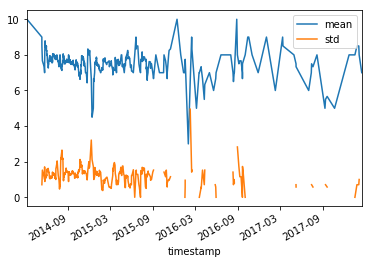

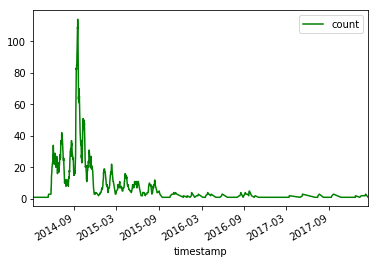

In [196]:
# do some random movies
test_id_1 = selected_movies.iloc[200].name
open_timestamp = pd.Timestamp(year=2009, month=9, day=18)
close_timestamp = pd.Timestamp(year=2010, month=1, day=28)

plotRollingMeanStd(test_id_1, '10d', '10d', open_timestamp, close_timestamp)

The Secret Life of Walter Mitty (2013) 2018-02-08 23:53:14 2013-10-06 04:12:30


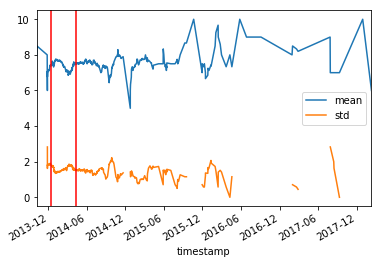

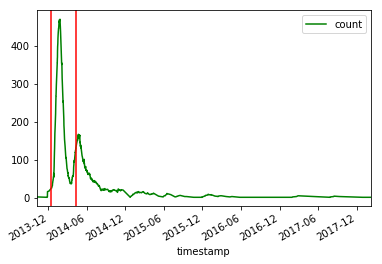

In [188]:
# do some random movies
test_id_1 = selected_movies.iloc[9].name
open_timestamp = pd.Timestamp(year=2013, month=12, day=15)
close_timestamp = pd.Timestamp(year=2014, month=4, day=10)

plotRollingMeanStd(test_id_1, '30d', '30d', open_timestamp, close_timestamp)

The Secret Life of Walter Mitty (2013) 2018-02-08 23:53:14 2013-10-06 04:12:30


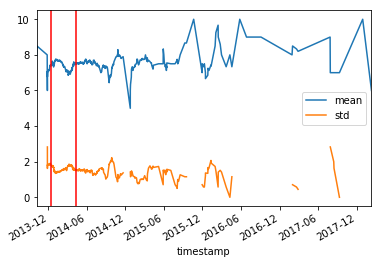

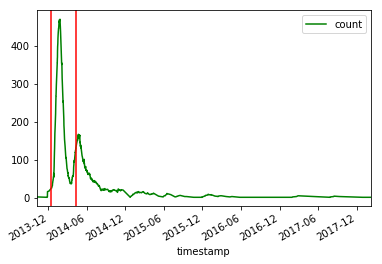

In [197]:
# do some random movies
test_id_1 = selected_movies.iloc[9].name
open_timestamp = pd.Timestamp(year=2013, month=12, day=15)
close_timestamp = pd.Timestamp(year=2014, month=4, day=10)

plotRollingMeanStd(test_id_1, '30d', '30d', open_timestamp, close_timestamp)

The Secret Life of Walter Mitty (2013) 2018-02-08 23:53:14 2013-10-06 04:12:30


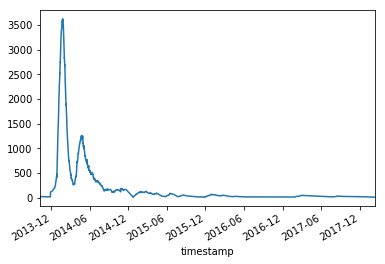

In [211]:
# do some random movies
test_id_1 = selected_movies.iloc[9].name
open_timestamp = pd.Timestamp(year=2013, month=12, day=15)
close_timestamp = pd.Timestamp(year=2014, month=4, day=10)

plotRollingMeanTimesCount(test_id_1, '30d', '30d', open_timestamp, close_timestamp)

The Wolf of Wall Street (2013) 2014-04-09 21:49:47 2013-12-25 04:54:06


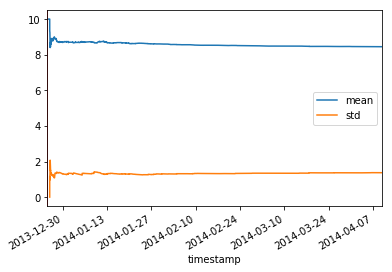

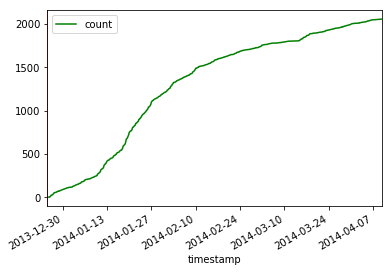

In [217]:
# do some random movies
test_id_1 = selected_movies.iloc[30].name
open_timestamp = pd.Timestamp(year=2013, month=12, day=25)
close_timestamp = pd.Timestamp(year=2014, month=4, day=10)



plotRollingMeanStd_showtime(test_id_1, '2000d', '2000d', open_timestamp, close_timestamp)

In [ ]:
# do some random movies
test_id_1 = selected_movies.iloc[30].name
open_timestamp = pd.Timestamp(year=2013, month=12, day=25)
close_timestamp = pd.Timestamp(year=2014, month=4, day=3)

ratings = mt_ratings[mt_ratings.movie_id == test_id_1]
ratings = ratings[open_timestamp:close_timestamp]
print mt_movies.loc[test_id_1].title, ratings.index.max(), ratings.index.min()

test_ratings = ratings['rating']
(test_ratings.rolling('2000d').mean()/test_ratings.mean()).iloc[3:].plot()
plt.legend(['rolling mean long term'])
plt.axvline(x=open_timestamp, color='red')
plt.axvline(x=close_timestamp, color='red')
plt.axhline(y=1, color='red')

plt.figure()
plt.scatter(x=test_ratings.index, y=test_ratings.rolling('2000d').count()+np.random.rand(len(test_ratings))*len(test_ratings)/50, color='green', s=1)

In [227]:
pd.Timestamp(year=2018, month=12, day=21)
pd.to_datetime('2018/12/21')

boxoffice['open_date'] = pd.to_datetime(boxoffice['open_date'])

Timestamp('2018-12-21 00:00:00')